[0.1357629916428281, 0.035800719292663506, -0.2489072061945798]
[0.7344515181536184, 1.4689030363072368, 2.9378060726144737]
[0.14107794717629377, 0.14185924775381664, 0.1419255191350609, 0.14199178028125503, 0.14248473622830493, 0.14280816046631242, 0.14225672256293695, 0.1432414602592551, 0.1432267793037861, 0.14307994207220412, 0.14347628714100955, 0.1428228557713737, 0.1431166560984387, 0.14351296721367635, 0.14363032233754675, 0.14348362340687945, 0.14307994207220412, 0.14326348074913037, 0.1425803187886375, 0.14319007471382544, 0.14345427758933776, 0.14326348074913037, 0.1429330545008871, 0.14274202535769084, 0.14262442663008532, 0.14241119667941624, 0.14233028860585792, 0.14247738284097244, 0.14219786064146442, 0.14185188363511542, 0.14126234435379997, 0.14122547125252263, 0.1415056274306122, 0.14110745604617408, 0.14104105823741617, 0.14106319198096604]
[0.4896343454357456, 0.49453068889010304, 0.49942703234446056, 0.504323375798818, 0.5092197192531754, 0.5141160627075329, 0.51

Text(0,0.5,'Reactivity p = (k-1)/k')

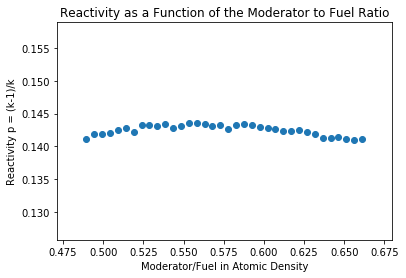

In [52]:
import math
import csv
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#csv reader
csv_arr = []
with open('cp3_data.csv') as csv_in:
    filereader = csv.reader(csv_in)
    for row in filereader:
        csv_arr.append(row)
#I accidentally deleted the majority of my res.m output files, but kept a list of the implicit keff, which is what this uses
imp_k = [float(i) for i in csv_arr[0]]
mass_dens = [float(i) for i in csv_arr[1]]

higher_end = [1.5,3,6]
high_stuff = [1.15709,1.03713,.8007]
#Calculating reactivity and moderator/fuel ratio
def reactivity(k_values):
    p_values =[]
    this = np.arange(0, len(k_values))
    for i in this:
        tat = (k_values[i]-1)/k_values[i]
        p_values.append(tat)
    return p_values
reactivities = reactivity(imp_k)

#This converts the moderators in mass density to atom density, then divides by the fuel in atom density
def mod_fuel_ratio(mod_dense):
    ratio = []
    atom_dense = []
    that = np.arange(0, len(mod_dense))
    for i in that:
        #The moderator mass density doesn't change, so neither does its atom density, precalculated here
        tit = (mod_dense[i]/18)*6.022e23
        atom_dense.append(tit)
        rat = tit/6.832763238e22
        ratio.append(rat)
    return ratio

mod_fuel_ratios = mod_fuel_ratio(mass_dens)
outly_react = reactivity(high_stuff)
outly_mod = mod_fuel_ratio(higher_end)
print(reactivity(high_stuff))
print(mod_fuel_ratio(higher_end))
print(reactivities)
print(mod_fuel_ratios)
print(max(reactivities))
print(mod_fuel_ratios[reactivities.index(max(reactivities))])
print(mass_dens[reactivities.index(max(reactivities))])
print(imp_k[reactivities.index(max(reactivities))])
#This is mainly for making the graph
plt.scatter(mod_fuel_ratios,reactivities)
plt.title("Reactivity as a Function of the Moderator to Fuel Ratio")
plt.xlabel("Moderator/Fuel in Atomic Density")
plt.ylabel("Reactivity p = (k-1)/k")

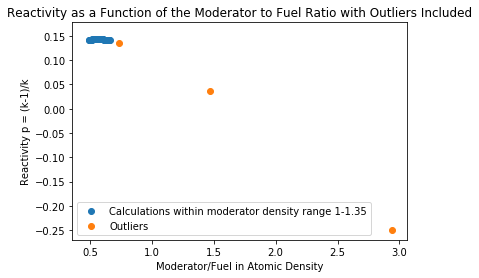

In [51]:
#This is the graph with the outliers used to determine where to start calculations
plt.scatter(mod_fuel_ratios,reactivities,label = 'Calculations within moderator density range 1-1.35')
plt.title("Reactivity as a Function of the Moderator to Fuel Ratio with Outliers Included")
plt.xlabel("Moderator/Fuel in Atomic Density")
plt.ylabel("Reactivity p = (k-1)/k")
plt.scatter(outly_mod,outly_react,label='Outliers')
plt.legend()